<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural

## Taller #11: Twitter
`Fecha de entrega: Mayo 20, 2021 (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

###  `[25 pts]` Punto 1: Extraer Tuits
Extraer mínimo 100 tuits de Twitter usando la API

❌ No escoger un tema de los que hicimos en clase (día de las madres, Giro de Italia, #EraGoldeYepes)

In [9]:
import pandas as pd
import tweepy

import re
import numpy as np
import pandas as pd
from wordcloud import WordCloud, ImageColorGenerator

from nltk.corpus import stopwords
stopwords = stopwords.words("spanish")

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

In [2]:
keys = pd.read_csv("llaves.csv",header=None)
keys = dict(zip(keys[0],keys[1]))
keys.keys()

dict_keys(['api_key', 'api_secret_key', 'access_token', 'access_token_secret', 'bearer_token'])

In [3]:
auth = tweepy.OAuthHandler(keys['api_key'], keys['api_secret_key'])
auth.set_access_token(keys['access_token'], keys['access_token_secret'])
api = tweepy.API(auth, wait_on_rate_limit=True)

In [4]:
tweets = tweepy.Cursor(api.search,
                      q=['Juventus -RT'],
                      lang='es',
                      geocode='4.7110,-74.0721,1000km',
                      tweet_mode='extended',
                      include_rts=False,
                      ).items(100)

In [5]:
t = [tweet for tweet in tweets]

In [6]:
t_processed = []

for tweet in t: 
    temp = []
    temp.append(tweet.full_text)
    temp.append(tweet.created_at)
    temp.append('Bogotá')
    temp.append(tweet.user.location)
    temp.append(tweet.id)
    temp.append(f"https://twitter.com/i/web/stuatus/{tweet.id}")
    
    t_processed.append(temp)

In [7]:
data = pd.DataFrame(t_processed)
data.columns = ['tweets','date','city','user_location','id','link']
data.head(10)

,tweets,date,city,user_location,id,link
0,@FOXSportsMX Psg? Chelsea? Yo solo dejaría el ...,2021-05-20 00:57:23,Bogotá,"Quito, Ecuador",1395181825883049985,https://twitter.com/i/web/stuatus/139518182588...
1,@Juezcentral @PatoCornejo Campeón de q copa es...,2021-05-20 00:57:18,Bogotá,Ecuador,1395181806056521728,https://twitter.com/i/web/stuatus/139518180605...
2,"#DEPORTES ⚽️\n\n#Juventus, con Dybala, salió c...",2021-05-20 00:53:00,Bogotá,Argentina,1395180722995015687,https://twitter.com/i/web/stuatus/139518072299...
3,Juventus conquistó la Coppa de Italia ante Ata...,2021-05-20 00:48:19,Bogotá,"Caracas, Venezuela",1395179547310665729,https://twitter.com/i/web/stuatus/139517954731...
4,#CopaItalia ⚽️🇮🇹 | La @juventusfc venció a la ...,2021-05-20 00:46:00,Bogotá,Caracas-Venezuela,1395178961395589124,https://twitter.com/i/web/stuatus/139517896139...
5,Juventus derrota 2-1 al Atalanta y se proclama...,2021-05-20 00:45:04,Bogotá,Honduras,1395178728116850688,https://twitter.com/i/web/stuatus/139517872811...
6,#Deportes Esta es la primera Copa Italia que g...,2021-05-20 00:44:00,Bogotá,Bogotá - Colombia,1395178458251206656,https://twitter.com/i/web/stuatus/139517845825...
7,#Deportes | La presencia de 4.300 espectadores...,2021-05-20 00:39:06,Bogotá,"Medellín, Colombia",1395177227805937665,https://twitter.com/i/web/stuatus/139517722780...
8,"@TNTSportsAR Un energúmeno, jugó en un argenti...",2021-05-20 00:34:43,Bogotá,Argentina,1395176124301418502,https://twitter.com/i/web/stuatus/139517612430...
9,🎤| “Quiero quedarme en la Juventus. Eso es par...,2021-05-20 00:33:13,Bogotá,"Barranquilla, Colombia",1395175745538961414,https://twitter.com/i/web/stuatus/139517574553...


###  `[25 pts]` Punto 2: Hacer una visualización sobre esos tuits

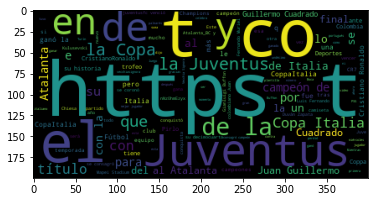

In [10]:
# palabras = pd.read_csv("reviews_vidjew_es.csv")
palabras = data.tweets.str.cat(sep=" ")
# palabras
wordcloud = WordCloud().generate(palabras)

plt.imshow(wordcloud)
plt.show()

In [13]:
stopwords.extend(["https"])

In [14]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+"," ", texto)
    texto = texto.split()
    texto = [palabra for palabra in texto if palabra not in stopwords]
    texto = " ".join(texto)
    return(texto)

words = pre_procesado(palabras)

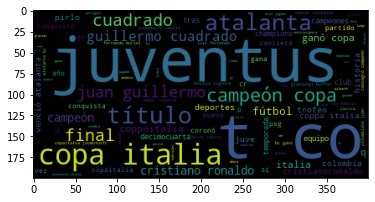

In [15]:
wordcloud = WordCloud().generate(words)

plt.imshow(wordcloud)
plt.show()

In [17]:
img = PIL.Image.open("cr7.png")

In [18]:
mask = np.array(img)

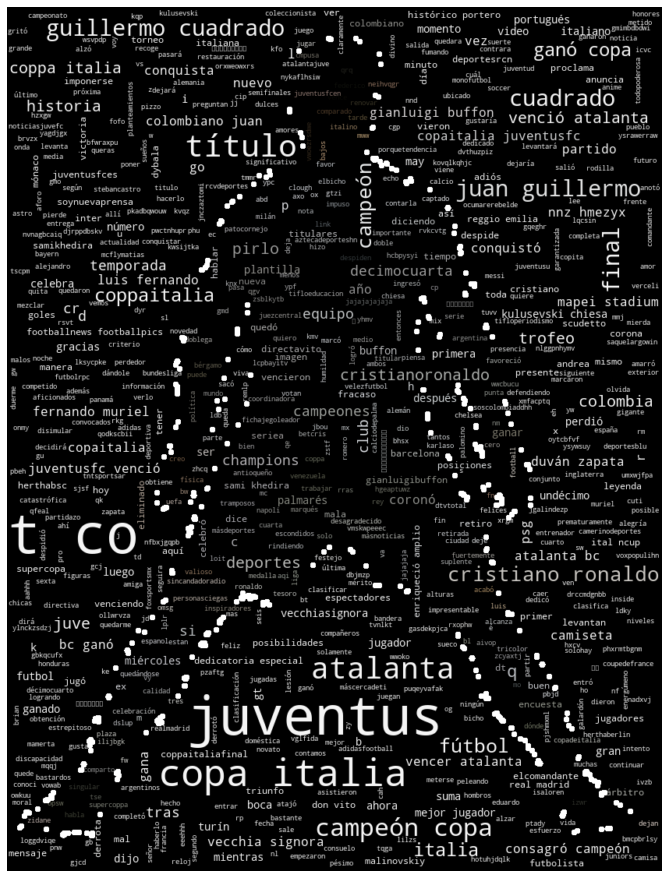

In [35]:
wordcloud = WordCloud(width=1500, height=800,
                      max_font_size=70, max_words=3000,
                      background_color="black", colormap="spring",
                      stopwords=stopwords, collocations=True,
                      mask=mask, contour_width=15, contour_color='white').generate(words) 
image_colors=ImageColorGenerator(mask)

wordcloud.to_file("cr7.png")

plt.figure(figsize=(15,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()